# Pokemon Dataset Analysis

This project focuses on a Pokemon dataset that includes 898 Pokemon, 1072 including alternate forms. The dataset contains information such as their types, Total stats, Attack stats, Defense stats on each Pokemon and more. The purpose of this project is to analyse the different types and identify and trends or patterns among these types as well as learn about their strengths and weaknesses.

The dataset was cleaned and preprocessed for ease of analysis and is available under an open license for research and data analysis purposes. The dataset is provided by a user from Kaggle (https://www.kaggle.com/datasets/jaidalmotra/pokemon-dataset). We will be using Python to analyze the dataset and a series of visualisations such as pandas, seaborn, matplotlib and SciPy libraries to answer the following questions:

1. Which Pokemon type is more common?
2. How do the stats of each Pokemon type differ from each other?
3. Are legendary Pokemon stronger than non-legendary Pokemon?
4. Which generation has the strongest Pokemon?
5. What is the strongest Pokemon in each generation?

## Import Libraries

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt 
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load and Inspect Data

In [3]:
pokemon = pd.read_csv('Pokemon.csv')
pokemon.info()
pokemon.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   number      1072 non-null   int64 
 1   name        1072 non-null   object
 2   type1       1072 non-null   object
 3   type2       574 non-null    object
 4   total       1072 non-null   int64 
 5   hp          1072 non-null   int64 
 6   attack      1072 non-null   int64 
 7   defense     1072 non-null   int64 
 8   sp_attack   1072 non-null   int64 
 9   sp_defense  1072 non-null   int64 
 10  speed       1072 non-null   int64 
 11  generation  1072 non-null   int64 
 12  legendary   1072 non-null   bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 101.7+ KB


,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,3,Gigantamax Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False


This dataset contains 1072 rows and 13 columns, containing details such as their types and stats on various Pokemon from different generations. It seems that all columns do not have null values except the 'type2' column.

Here's a quick summary of the columns:
- **Name**: Name of the Pokémon.
- **Type 1**: Primary type of the Pokémon (e.g., Grass, Fire, Water, etc.).
- **Type 2**: Secondary type of the Pokémon, if any.
- **Total**: Total combat power of the Pokémon.
- **HP**: Hit Points, indicating the Pokémon's health.
- **Attack**: Attack power of the Pokémon.
- **Defense**: Defensive power of the Pokémon.
- **Sp. Atk**: Special Attack power of the Pokémon.
- **Sp. Def**: Special Defense power of the Pokémon.
- **Speed**: Speed attribute of the Pokémon.
- **Generation**: Generation of the Pokémon.
- **Legendary**: Whether the Pokémon is legendary or not.

In [4]:
pokemon.describe(include = 'all')

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
count,1072.000000,1072,1072,574,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072
unique,NaN,1072,20,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Bulbasaur,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,1,136,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,954
mean,445.219216,NaN,NaN,NaN,440.885261,70.486940,80.938433,74.968284,73.273321,72.476679,68.792910,4.294776,NaN
std,267.772806,NaN,NaN,NaN,121.379077,26.868039,32.463582,31.208059,32.643119,27.934253,30.076281,2.346472,NaN
min,1.000000,NaN,NaN,NaN,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,0.000000,NaN
25%,209.750000,NaN,NaN,NaN,330.000000,50.000000,56.000000,52.000000,50.000000,50.000000,45.000000,2.000000,NaN
50%,442.500000,NaN,NaN,NaN,460.500000,68.000000,80.000000,70.000000,65.000000,70.000000,65.000000,4.000000,NaN
75%,681.250000,NaN,NaN,NaN,519.250000,84.000000,100.000000,90.000000,95.000000,90.000000,90.000000,6.000000,NaN


## Data Cleaning and Preparation 

We will first take a look at all the different types of Pokemon. It seems that there are 2 values in the type1 column that are invalid, 'Blastoise' and 'Graass'. 

In [5]:
pokemon.type1.unique()

array(['Grass', 'Fire', 'Water', 'Blastoise', 'Bug', 'Normal', 'Dark',
       'Poison', 'Electric', 'Ground', 'Ice', 'Fairy', 'Steel',
       'Fighting', 'Psychic', 'Rock', 'Ghost', 'Dragon', 'Flying',
       'Graass'], dtype=object)

In [6]:
pokemon[pokemon.type1 == 'Blastoise']

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
15,9,Gigantamax Blasoise,Blastoise,Water,530,79,83,100,85,105,78,1,False


In [7]:
pokemon[pokemon.type1 == 'Graass']

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
978,830,Eldegoss,Graass,NaN,460,60,50,90,80,120,60,8,False


We will correct these values from 'Blastoise' to 'Water' and 'Graass' to 'Grass'.

In [8]:
pokemon.type1.replace('Blastoise', 'Water', inplace = True)
pokemon.type1.replace('Graass', 'Grass', inplace = True)

Now, we will look at the unique values in the 'generation' column. The value '0' should not be there so we will look at the rows with this value.

In [9]:
pokemon.generation.unique()

array([1, 7, 8, 2, 3, 4, 5, 6, 0], dtype=int64)

In [10]:
pokemon[pokemon.generation == 0]

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
950,808,Meltan,Steel,NaN,300,46,65,65,55,35,34,0,True
951,809,Melmetal,Steel,NaN,600,135,143,143,80,65,34,0,True
952,809,Gigantamax Melmetal,Steel,NaN,600,135,143,143,80,65,34,0,True


We can change the '0' value to '7' since we know the actual generation of this Pokemon.

In [11]:
pokemon.generation.replace(0, 7, inplace = True)

## Data Question 1: Which Pokemon types are more common?

In [12]:
# Initial count for type1 and type2
types = pokemon.type1.value_counts().rename_axis('Type').reset_index(name = 'Count')
types_two = pokemon.type2.value_counts().rename_axis('Type').reset_index(name = 'Count')

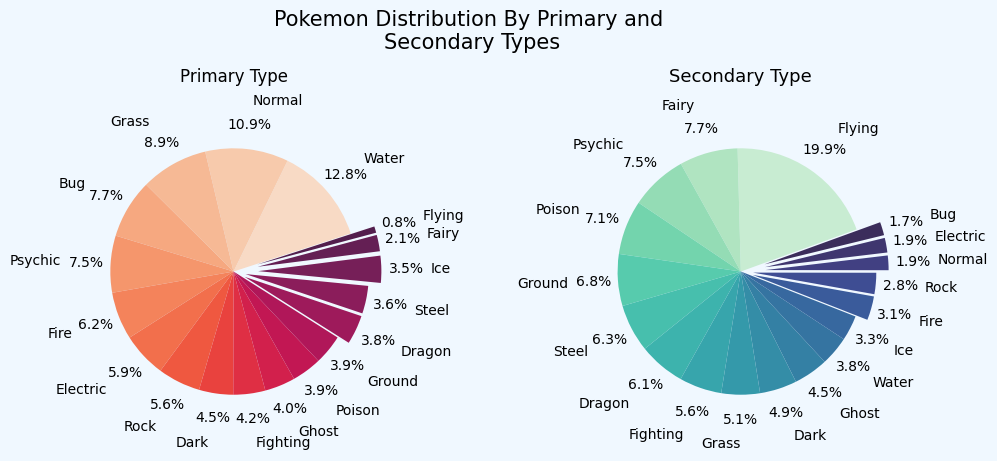

In [13]:
# Creating figure 
fig = plt.figure(figsize = (12,4), facecolor = 'aliceblue')
plt.suptitle('Pokemon Distribution By Primary and \nSecondary Types', y = 1.15, fontsize = 15)

# Plotting pie charts for type1
plt.subplot(1,2,1)
plt.pie(x = types.Count, labels = types.Type, autopct = '%1.1f%%', pctdistance = 1.2, labeldistance = 1.4, 
        colors = sns.color_palette("rocket_r", 22), explode = [0,0,0,0,0,0,0,0,0,0,0,0,0,0.1,0.1,0.2,0.2,0.2],
       startangle = 18)
plt.title('Primary Type', y = 1.09, fontsize = 12)

# Plotting pie charts for type2
plt.subplot(1,2,2)
plt.pie(x = types_two.Count, labels = types_two.Type, autopct = '%1.1f%%', pctdistance = 1.2, labeldistance = 1.4, 
        colors = sns.color_palette("mako_r", 22), explode = [0,0,0,0,0,0,0,0,0,0,0,0,0,0.1,0.1,0.2,0.2,0.2],
       startangle = 20)
plt.title('Secondary Type', y = 1.09, fontsize = 13)
plt.show()

Water and Flying types are apparently the most common primary and secondary type with 12.8% and 19.9% respectively. The least common primary and secondary type is Flying and Bug type respectively. 

In [54]:
# Combining values in type1 and type2 column
combined_types = pd.concat([pokemon.type1 ,pokemon.type2])

# Count for all types 
all_types = combined_types.value_counts().rename_axis('Type').reset_index(name = 'Count')

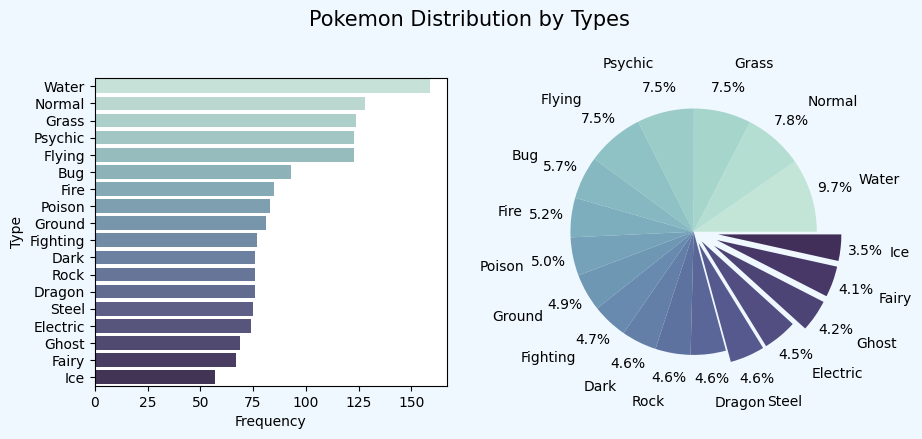

In [15]:
# Creating figure for pokemon by types 
fig = plt.figure(figsize = (10,4), facecolor = 'aliceblue')
plt.suptitle('Pokemon Distribution by Types', fontsize = 15, y = 1.05)

# Plotting bar chart 
plt.subplot(1,2,1)
sns.barplot(data = all_types, y = 'Type', x = 'Count', palette = sns.cubehelix_palette(20, start=.5, rot=-.5))
plt.xlabel('Frequency')

# Plotting pie chart
plt.subplot(1,2,2)
plt.pie(x = all_types.Count, labels = all_types.Type, colors = sns.cubehelix_palette(20, start=.5, rot=-.5), autopct = '%1.1f%%'
        ,explode = [0,0,0,0,0,0,0,0,0,0,0,0,0,0.1,0.1,0.2,0.2,0.2], pctdistance = 1.2, labeldistance = 1.4)
plt.show()

For this figure, we considered both types for each Pokemon. Water Pokemon are still the most common type with more than 150 Pokemon. (nearly 10% of all Pokemon). Normal type Pokemon follows with around 125 Pokemon, approximately 8% of all Pokemon. Ice Pokemon have the lowest frequency with only around 55 Pokemon. 

## Data Question 2: How do the stats of Pokemon type differ from each other??

In [16]:
# Creating dataframe without legendaries
non_legendary = pokemon[pokemon.legendary == False]

# Creating dataframe with only legendaries
legendary = pokemon[pokemon.legendary == True]

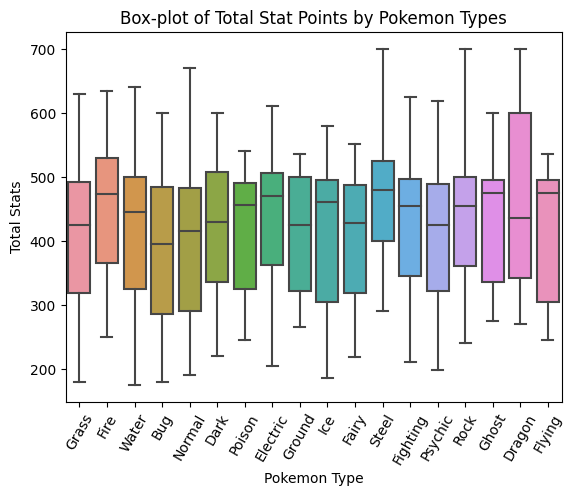

In [17]:
# Plotting box-plot for stats of pokemon types 
sns.boxplot(data = non_legendary, x = 'type1', y = 'total')
plt.title('Box-plot of Total Stat Points by Pokemon Types')
plt.xlabel('Pokemon Type')
plt.ylabel('Total Stats')
plt.xticks(rotation = 60)
plt.show()

Dragon type Pokemon has the longest box length which means that it has the highest dispersion in total statas. Steel, Rock and Dragon type have the highest maximum total stat of 700, whilst Grass and Water type have the lowest minimum total stats. Steel and Bug types have the highest and lowest median total stats respectively.

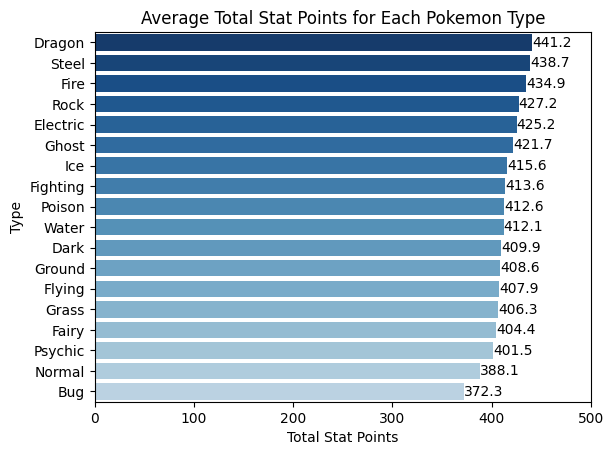

In [140]:
# Average total stat points for each type
type_total = non_legendary.groupby('type1').total.mean().sort_values(ascending = False).rename_axis('Type').reset_index(name = 'Total')

# Plotting bar plot
ax = sns.barplot(data = type_total, x = 'Total', y = 'Type', palette = sns.color_palette("Blues_r", 25))
ax.bar_label(ax.containers[0], fmt='%.1f')
plt.title('Average Total Stat Points for Each Pokemon Type')
plt.xlabel('Total Stat Points')
plt.xlim(0, 500)
plt.show()

Dragon type Pokemon have the highest average total stat points with 441.2 points, followed by Steel type Pokemon with an average of 438.7 points. Most Pokemon type have an average total stat points of more than 400 except Normal and Bug types which have the two lowest average total stat points of 388.1 and 372.3 respectively.

## Data Question 3: Are legendary Pokemon stronger than non-legendary Pokemon?

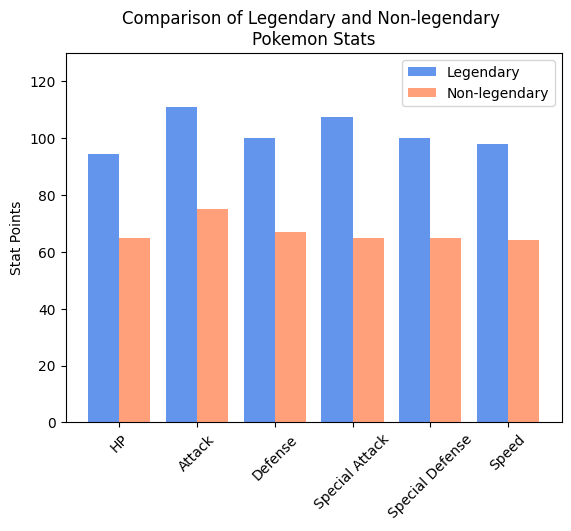

In [18]:
barwidth = 0.4
xlabels = ['HP', 'Attack', 'Defense', 'Special Attack', 'Special Defense', 'Speed']
r1 = np.arange(len(xlabels))

# Plotting bar chart for stats of legendary pokemon
plt.bar(height = [legendary.hp.median(), legendary.attack.median(), legendary.defense.median(), 
                  legendary.sp_attack.median(), legendary.sp_defense.median(), legendary.speed.median()], 
        x = r1 - 0.2, width = barwidth, color = 'cornflowerblue')

# Plotting bar chart for stats of non-legendary pokemon
plt.bar(height = [non_legendary.hp.median(), non_legendary.attack.median(), non_legendary.defense.median(), 
                  non_legendary.sp_attack.median(), non_legendary.sp_defense.median(), non_legendary.speed.median()], 
        x = r1 + 0.2, width = barwidth, color = 'lightsalmon')
plt.legend(['Legendary', 'Non-legendary'], loc = 'upper right')
plt.ylim(0, 130)
plt.xticks(ticks = r1, labels = xlabels, rotation = 45)
# plt.xlabel('Pokemon Stats')
plt.ylabel('Stat Points')
plt.title('Comparison of Legendary and Non-legendary \nPokemon Stats')
plt.show()

It seems that legendary Pokemon have significantly higher stats compared to non-legendary Pokemon. Legendary Pokemon have stat range of approximately 95 to 110 whereas non-legendary Pokemon have a range of 65 to 75 only. I believe it is obvious to see that legendary Pokemon are stronger than non-legendaries.

In [55]:
# Percentage difference in stats between legendary and non-legendary Pokemon
percentage_diff_mean = []
for i in range(0, len(stats)):
    percentage_diff_mean.append((legendary['{x}'.format(x=stats[i])].mean()-non_legendary['{x}'.format(x=stats[i])].mean())/(non_legendary['{x}'.format(x=stats[i])].mean())*100)   
    print('The {stat} stats of a legendary Pokemon is approximately {value}% more than a non-legendary Pokemon on average.'.format(stat=xlabels[i],value = round(percentage_diff_mean[i],1)))

The HP stats of a legendary Pokemon is approximately 43.6% more than a non-legendary Pokemon on average.
The Attack stats of a legendary Pokemon is approximately 51.0% more than a non-legendary Pokemon on average.
The Defense stats of a legendary Pokemon is approximately 42.4% more than a non-legendary Pokemon on average.
The Special Attack stats of a legendary Pokemon is approximately 65.7% more than a non-legendary Pokemon on average.
The Special Defense stats of a legendary Pokemon is approximately 49.9% more than a non-legendary Pokemon on average.
The Speed stats of a legendary Pokemon is approximately 55.0% more than a non-legendary Pokemon on average.


## Data Question 4: Which generation has the strongest Pokemon?

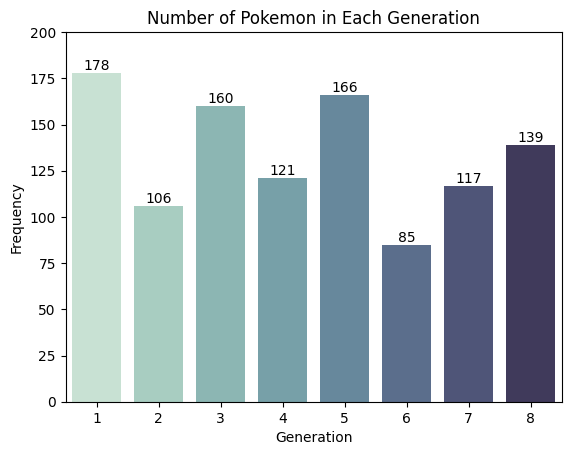

In [159]:
generation = pokemon.generation.value_counts().rename_axis('Generation').reset_index(name = 'Frequency')
generation
ax = sns.barplot(data = generation, x = 'Generation', y = 'Frequency', palette = sns.cubehelix_palette(9,start=.4, rot=-.5))
ax.bar_label(ax.containers[0])
plt.title('Number of Pokemon in Each Generation')
plt.ylim(0, 200)
plt.show()

Gen 1 has the highest number of Pokemon with 178 Pokemon, followed by Gen 5 with 166 Pokemon. Gen 6 has the least number of Pokemon with only 85 Pokemon. 

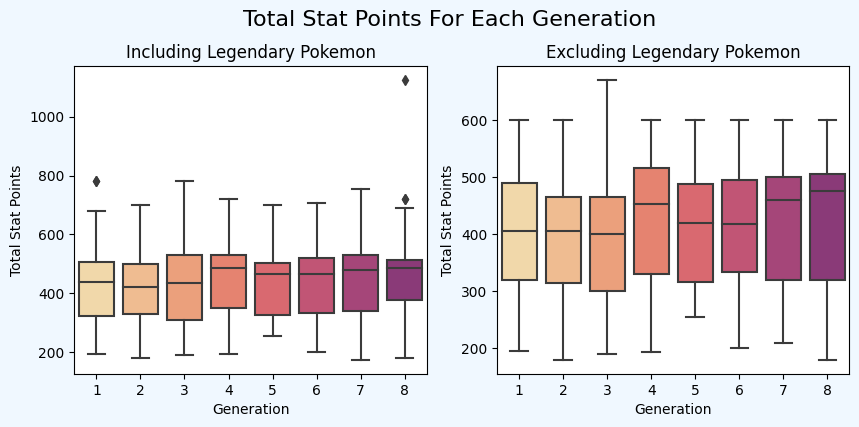

In [91]:
# Creating figure
fig = plt.figure(figsize = (10,4), facecolor = 'aliceblue')
plt.suptitle('Total Stat Points For Each Generation', fontsize = 16, y = 1.02)

# Plotting box-plot for legendary pokemon stats
plt.subplot(1,2,1)
sns.boxplot(data = pokemon, x = 'generation', y = 'total', palette = sns.color_palette("magma_r", 13))
plt.title('Including Legendary Pokemon')
plt.xlabel('Generation')
plt.ylabel('Total Stat Points')

# Plotting box-plot for non-legendary pokemon stats
plt.subplot(1,2,2)
sns.boxplot(data = non_legendary, x = 'generation', y = 'total', palette = sns.color_palette("magma_r", 13))
plt.title('Excluding Legendary Pokemon')
plt.xlabel('Generation')
plt.ylabel('Total Stat Points')
plt.show()

Gen 3 Pokemon have the largest spread of total stat points when legendary Pokemon are included in the data. However, when legendary Pokemon are excluding, it seems that the spread of total stat points are almost equal throughout all generations. Gen 3 also has the highest maximum total stat points. Gen 8 has the highest median total stats with approximately 450 points. 

## Data Question 5: What is the strongest non-legendary Pokemon in each generation?

There are alternate forms of Pokemon such as 'Mega' forms of the base Pokemon. However, we will exclude them for this question as we are only looking for the strongest base Pokemon.

In [93]:
# Removing alternate forms of Pokemon
non_legendary = non_legendary[~non_legendary.name.str.contains('|'.join(['Mega','Forme','Ash']))]

In [22]:
# Finding the Pokemon with highest stats in each generation
idx = non_legendary.groupby('generation')['total'].idxmax()
strongest_gen = non_legendary.loc[idx]
strongest_gen

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
202,149,Dragonite,Dragon,Flying,600,91,134,95,100,100,80,1,False
310,248,Tyranitar,Rock,Dark,600,100,134,110,95,100,61,2,False
358,289,Slaking,Normal,NaN,670,150,160,100,95,65,100,3,False
538,445,Garchomp,Dragon,Ground,600,108,130,95,80,85,102,4,False
747,635,Hydreigon,Dark,Dragon,600,92,105,90,125,90,98,5,False
828,706,Goodra,Dragon,NaN,600,90,100,70,110,150,80,6,False
923,784,Kommo-o,Dragon,Fighting,600,75,110,125,100,105,85,7,False
1051,887,Dragapult,Dragon,Ghost,600,88,120,75,100,75,142,8,False


As shown above, 6 out of 8 of the Pokemon are Dragon types. This may indicate that Dragon type Pokemon are relatively strong in each generation. Slaking is the the only Pokemon with a total stat of 670 which implies that it could be the strongest. However, Slaking has a special ability that prevents him from attacking consecutively.

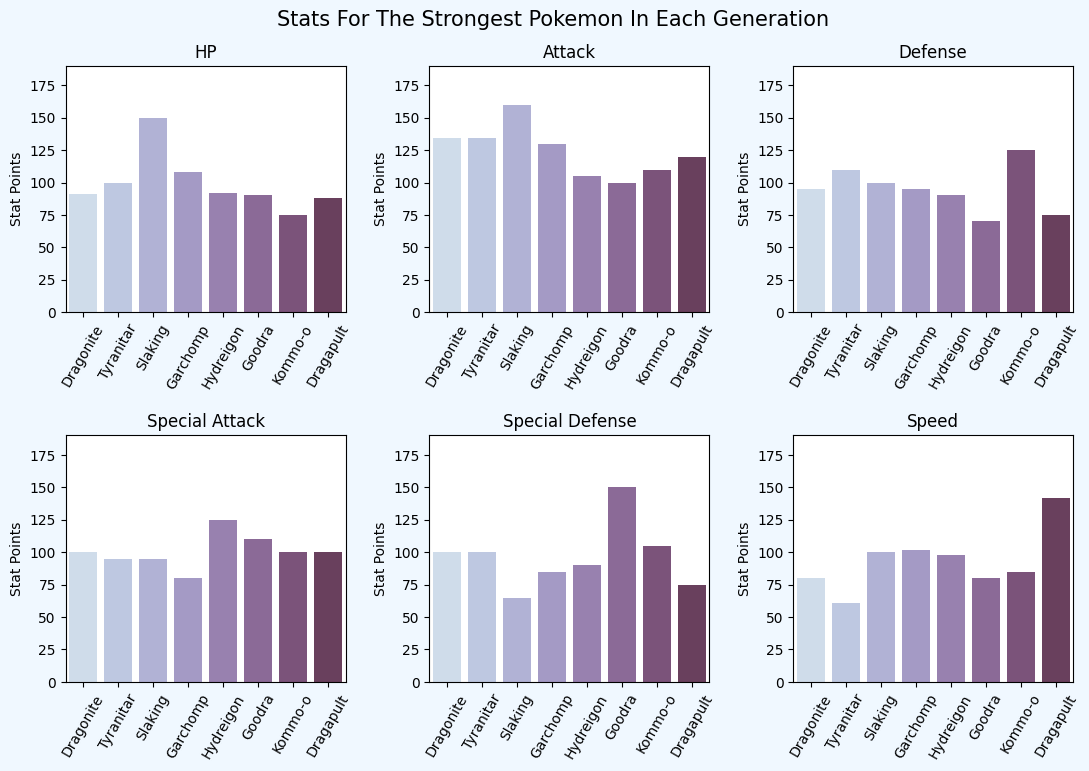

In [30]:
stats = ['hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed']

# Creating figure
fig = plt.figure(facecolor = 'aliceblue', figsize = (13,8))
plt.subplots_adjust(wspace = 0.3, hspace = 0.5)
plt.suptitle('Stats For The Strongest Pokemon In Each Generation', fontsize = 15, y = 0.95)

# Plotting bar charts for stats of strongest Pokemon in each gen
for i in range(0,len(stats)):
    plt.subplot(2,3,i+1)
    sns.barplot(data = strongest_gen, x = 'name', y = stats[i], palette = sns.color_palette("ch:start=7,rot=-.5", 10))
    plt.title(xlabels[i])
    plt.ylabel('Stat Points')
    plt.xlabel('')
    plt.xticks(rotation = 60)
    plt.ylim((0,190))

plt.show()

Dragonite has generally high points in each stat overall. It's highest stat is its Attack, reaching around 130 points. Tyranitar has similar stats to Dragonite with its Attack stat being the same as Dragonite's. However, Tyranitar has the lowest points in Speed with only 60 points. Slaking has the highest stat points for both HP and Attack stat, reaching around 150 and 160 points respectively. However, its Special Attack stat is extremely low, around 60 only. Garchomp has decent stats overall as well with its highest stat being its Attack. Hydreigon's specialises in its Special Attack, approximately 125. Goodra and Kommo-o have the highest points in Special Defense and Defense respectively compared to the others. Lastly, Dragapult's speed is the highest with around 140 points.

## Conclusion 

This project investigates a dataset consisting information on Pokemon from generation 1 to 8. The purpose of this project is to explores the different types of Pokemon and learn more about their strengths and weaknesses. From our analysis, we found that Water type Pokemon are the most common across all generation, followed by Normal and Grass type Pokemon. Ice and Fairy Pokemon was also determined to be the rarest. Another finding that was discovered was Dragon type have the highest total stat points on average, next to Steel and Fire types. We compared the stats of legendary and non-legendary Pokemon and found that legendary Pokemon had stats 40% to 55% more than non-legendaries. Lastly, we found that the strongest non-legendary Pokemon from Gen 1 to 8, in order, are Dragonite, Tyranitar, Slaking, Garchomp, Hydreigon, Goodra, Kommo-o and Dragapult. Each of these Pokemon had a total stat of 600 except for Slaking.  